In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('loan_approval.csv')
df.head()

,Age,Log10_Income_USD,CreditScore,EmploymentType,MaritalStatus,City,ExistingLoansCount,Log10_LoanAmount_INR,Approved
0,24,6.443,348,Self-Employed,Married,Pune,5,11.029,0
1,55,5.445,613,Self-Employed,Married,Mumbai,3,10.765,0
2,49,5.620,427,Salaried,Married,Bengaluru,2,10.506,0
3,40,7.778,625,Salaried,Married,Mumbai,4,10.316,1
4,40,5.728,678,Salaried,Single,Bengaluru,3,10.327,0


In [4]:
df.columns

Index(['Age', 'Log10_Income_USD', 'CreditScore', 'EmploymentType',
       'MaritalStatus', 'City', 'ExistingLoansCount', 'Log10_LoanAmount_INR',
       'Approved'],
      dtype='object')

In [5]:
df.isnull().sum()

Age                     0
Log10_Income_USD        0
CreditScore             0
EmploymentType          0
MaritalStatus           0
City                    0
ExistingLoansCount      0
Log10_LoanAmount_INR    0
Approved                0
dtype: int64

<Axes: >

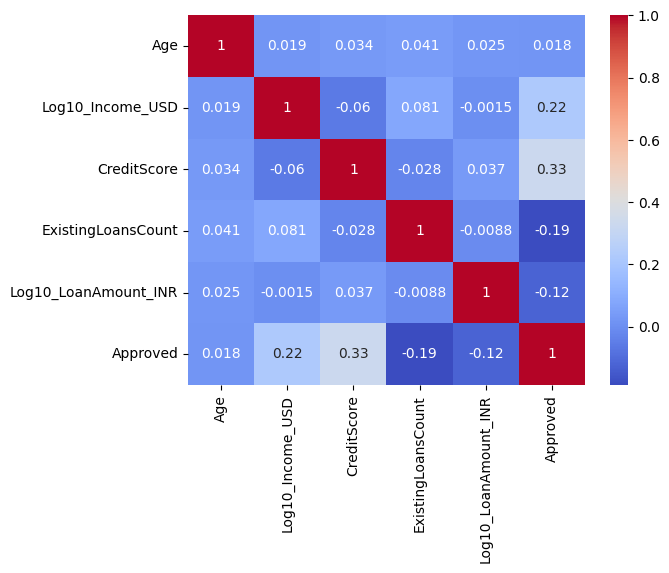

In [6]:
corr_metrics=df.corr(numeric_only=True)

sns.heatmap(corr_metrics,annot=True,cmap='coolwarm')

In [7]:
from sklearn.model_selection import train_test_split

X=df.drop('Approved',axis=1)
y=df['Approved']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_test.shape , X_train.shape , y_test.shape , y_train.shape

((100, 8), (400, 8), (100,), (400,))

In [8]:
df.head(3)

,Age,Log10_Income_USD,CreditScore,EmploymentType,MaritalStatus,City,ExistingLoansCount,Log10_LoanAmount_INR,Approved
0,24,6.443,348,Self-Employed,Married,Pune,5,11.029,0
1,55,5.445,613,Self-Employed,Married,Mumbai,3,10.765,0
2,49,5.620,427,Salaried,Married,Bengaluru,2,10.506,0


In [9]:
num_col=['Age','Log10_Income_USD','CreditScore','ExistingLoansCount','Log10_LoanAmount_INR']
cat_col=['EmploymentType','MaritalStatus','City']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_col),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_col)
    ]
)


model=Pipeline(steps=[
    ('Preprocessor',preprocessor),
    ('Logistic_Regression',LogisticRegression(max_iter=1000, solver="lbfgs", class_weight=None))
]

)

#Have a look of drug200(KNN)
model.fit(df[num_col+cat_col],y)

,steps,"[('Preprocessor', ...), ('Logistic_Regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediction

In [11]:
y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:,1]

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1       :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy : 0.84
Precision: 0.7894736842105263
Recall   : 0.5555555555555556
F1       : 0.6521739130434783
ROC AUC  : 0.9030948756976154

Confusion matrix:
 [[69  4]
 [12 15]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        73
           1       0.79      0.56      0.65        27

    accuracy                           0.84       100
   macro avg       0.82      0.75      0.77       100
weighted avg       0.84      0.84      0.83       100



Prediction for single value

In [13]:
import pandas as pd

new_app = pd.DataFrame([{
    "Age": 32,
    "Log10_Income_USD": 6.8,
    "CreditScore": 720,
    "EmploymentType": "Salaried",
    "MaritalStatus": "Married",
    "City": "Mumbai",
    "ExistingLoansCount": 1,
    "Log10_LoanAmount_INR": 10.3
}])

'''new_app=df.iloc[[3]]'''

pred_prob = model.predict_proba(new_app)[:, 1]
pred = model.predict(new_app)

print(f"Approval probability: {pred_prob[0]:.3f}")
print("Predicted class:", int(pred[0]))


Approval probability: 0.648
Predicted class: 1


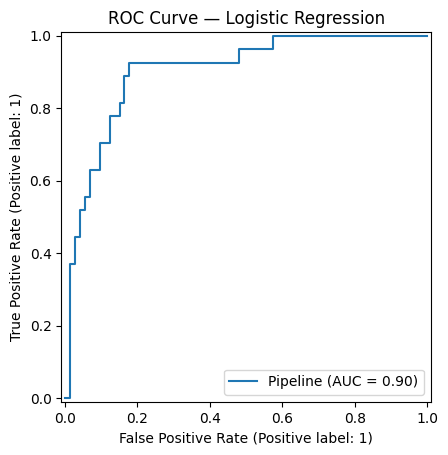

In [14]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve — Logistic Regression")
plt.show()


Save Pickle file

In [15]:
import pickle

with open('loan_approval.pkl','wb') as f:
    pickle.dump(df,f)

with open('model.pkl','wb') as f:
    pickle.dump(model,f)